In [1]:
%matplotlib inline
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import copy
import itertools
sns.set_style("white")
sns.set(style="ticks")
from matplotlib import rc
rc('text', usetex=True)

In [ ]:
def myFloat(myList):
    return map(float, myList)

In [2]:
all_data = p.read_csv('../data/newleaf_compete_compiled_data.csv',index_col=0,converters={'motiffreq':ast.literal_eval,'motiffreq_sd':ast.literal_eval,'motiffreq_se':ast.literal_eval,'motif':ast.literal_eval,'bias':ast.literal_eval})

In [3]:
cooperate_list = []
compete_list = []
zero_motif = []
for row in range(len(all_data)):
    if all_data['bias'][row] == [0.5,0.5]:
        cooperate_list.append(True)
        compete_list.append(True)
        if all_data['motif'][row][0].count('0') > 2:
            zero_motif.append(all_data['motif'][row][0])
        else:
            zero_motif.append(all_data['motif'][row][1])
    elif all_data['motif'][row][0].count('0') > 2:
        cooperate_list.append(False)
        compete_list.append(True)
        zero_motif.append(all_data['motif'][row][0])
    elif all_data['motif'][row][0].count('1') > 2:
        cooperate_list.append(True)
        compete_list.append(False)
        zero_motif.append(all_data['motif'][row][1])

all_data['cooperate'] = cooperate_list
all_data['compete'] = compete_list
all_data['zero_motif'] = zero_motif

In [4]:
all_data

,bias,cells,cellswithmotif,cellswithmotif_sd,cellswithmotif_se,elong,maxstrandlen,motif,motiffreq,motiffreq_sd,...,nonemptystrands_sd,nonemptystrands_se,nr_samples,rounds,sampler_start,strands,trials,cooperate,compete,zero_motif
0,"[0.5, 0.5]",100,"['0.78303999999999996', '0.0055196376692678243']","['0.0062646947252040473', '0.00551963766926782...","['0.0014008283263840615', '0.00123422850396513...",0.0500,7,"[00000, 11111]","[0.026563515868995979, 0.026720859127929774]","[0.00042602582969270464, 0.00036847211422622603]",...,['0.0010062715090868679'],['0.0002250091498139534'],50,7000,1000,100,20,True,True,00000
1,"[0.6, 0.4]",100,"['0.69462999999999997', '0.016145696020921505']","['0.019978015416952689', '0.016145696020921505']","['0.0044672200527845016', '0.00361028738468283...",0.0500,7,"[00000, 11111]","[0.033151330556673783, 0.033194263137421166]","[0.0022195408256048465, 0.002173387547884883]",...,['0.0009955282818684822'],['0.00022260689117814975'],50,7000,1000,100,20,False,True,00000
2,"[0.7, 0.3]",100,"['0.59461000000000008', '0.092301004869936268']","['0.085305673316608918', '0.092301004869936268']","['0.019074928440232748', '0.020639132128071662']",0.0500,7,"[00000, 11111]","[0.059753199164690428, 0.056418272547945736]","[0.013836420154208122, 0.013273114868409215]",...,['0.00082135366316830665'],['0.00018366026244127988'],50,7000,1000,100,20,False,True,00000
3,"[0.8, 0.2]",100,"['0.54421999999999993', '0.2062390678314853']","['0.20483661684376647', '0.2062390678314853']","['0.045802859954374026', '0.046116457528739122']",0.0500,7,"[00000, 11111]","[0.10786570810624171, 0.093566021158762808]","[0.043617299348785853, 0.042976838311198681]",...,['0.00089810940870250957'],['0.00020082336890909526'],50,7000,1000,100,20,False,True,00000
4,"[0.9, 0.1]",100,"['0.67671000000000014', '0.25972034498667984']","['0.25773335426366534', '0.25972034498667984']","['0.05763093002025909', '0.058075234652991282']",0.0500,7,"[00000, 11111]","[0.21846523167609955, 0.10677944122347405]","[0.0863052776627459, 0.089292350976521773]",...,['0.00082901914935663813'],['0.00018537431726104939'],50,7000,1000,100,20,False,True,00000
5,"[1.0, 0.0]",100,"['0.54250999999999994', '0.3316526924359276']","['0.32899100580411011', '0.3316526924359276']","['0.0735646252964018', '0.074159796520756438']",0.0500,7,"[00000, 11111]","[0.25619102220790013, 0.22239374932433537]","[0.15703337288481853, 0.15791405269472841]",...,['0.0010179160279708609'],['0.00022761294339294222'],50,7000,1000,100,20,False,True,00000
6,"[0.6, 0.4]",100,"['0.82796000000000003', '0.0065966355060743153']","['0.0062615014173918269', '0.00659663550607431...","['0.0014001142810499407', '0.00147505254143708...",0.0500,7,"[11111, 00000]","[0.028911430269514288, 0.029062897288985673]","[0.00034060666127784821, 0.00042786563802803268]",...,['0.0010599447910150633'],['0.00023701086051064897'],50,7000,1000,100,20,True,False,00000
7,"[0.7, 0.3]",100,"['0.85846', '0.0051188279908588449']","['0.0048025409940988546', '0.00511882799085884...","['0.0010738808127534454', '0.00114460473526890...",0.0500,7,"[11111, 00000]","[0.032173203290633397, 0.032173750227490958]","[0.00043543160814900626, 0.00044826116985947868]",...,['0.00091752190164592689'],['0.00020516413429251686'],50,7000,1000,100,20,True,False,00000
8,"[0.8, 0.2]",100,"['0.88006999999999991', '0.0045554802161791776']","['0.0049288031001451238', '0.00455548021617917...","['0.00110211387796362', '0.0010186363433532077']",0.0500,7,"[11111, 00000]","[0.034808408279791384, 0.03481641286167856]","[0.00043322381305633829, 0.0004028772578036081]",...,['0.0011062522135570991'],['0.00024736551497732878'],50,7000,1000,100,20,True,False,00000
9,"[0.9, 0.1]",100,"['0.89627000000000012', '0.0042572291458177524']","['0.0049832820510181631', '0.00425722914581775...","['0.0011142957417131188', '0.00095194537658418...",0.0500,7,"[11111, 00000]","[0.036533329478025005, 0.036612933270406982]","[0.00041372739691955724, 0.00042091426135845711]",...,['0.00096489

In [5]:
high_bias = []

for row in range(len(all_data)):
    high_bias.append(all_data['bias'][row][0])
all_data['high_bias'] = high_bias

In [6]:
compete_data = all_data[(all_data['compete'] == True) & (all_data['elong'] == 0.05)]
cooperate_data = all_data[(all_data['cooperate'] == True) & (all_data['elong'] == 0.05)]

In [7]:
np.unique(compete_data['motif'].values)
np.unique(cooperate_data['motif'].values)
print np.unique(compete_data['motif'].values)
print np.unique(cooperate_data['motif'].values)

[['00000', '11111'] ['00001', '11110'] ['00010', '11101']
 ['00011', '11100'] ['00100', '11011'] ['00101', '11010']
 ['01000', '10111'] ['01001', '10110'] ['01010', '10101']
 ['01100', '10011'] ['10000', '01111'] ['10001', '01110']
 ['10010', '01101'] ['10100', '01011'] ['11000', '00111']]
[['00000', '11111'] ['00001', '11110'] ['00010', '11101']
 ['00011', '11100'] ['00100', '11011'] ['00101', '11010']
 ['00111', '11000'] ['01000', '10111'] ['01001', '10110']
 ['01010', '10101'] ['01011', '10100'] ['01100', '10011']
 ['01101', '10010'] ['01110', '10001'] ['01111', '10000']
 ['10000', '01111'] ['10001', '01110'] ['10010', '01101']
 ['10011', '01100'] ['10100', '01011'] ['10101', '01010']
 ['10110', '01001'] ['10111', '01000'] ['11000', '00111']
 ['11010', '00101'] ['11011', '00100'] ['11100', '00011']
 ['11101', '00010'] ['11110', '00001'] ['11111', '00000']]


IndexError: tuple index out of range

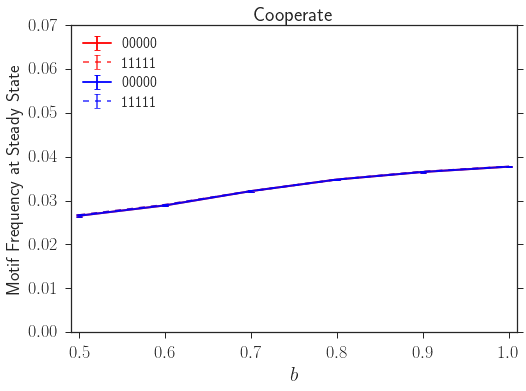

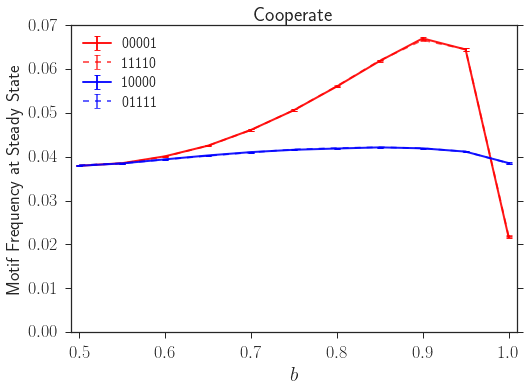

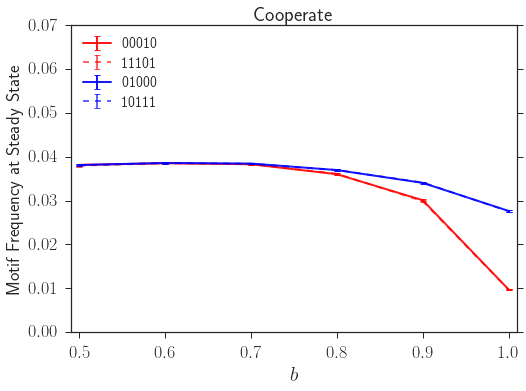

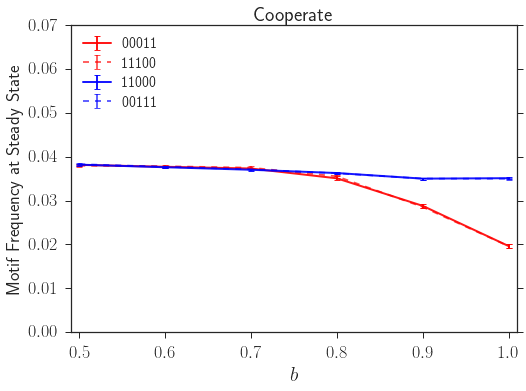

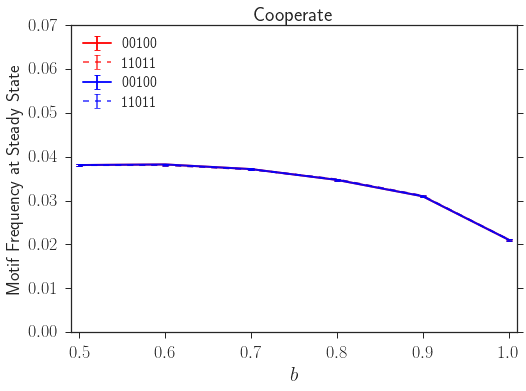

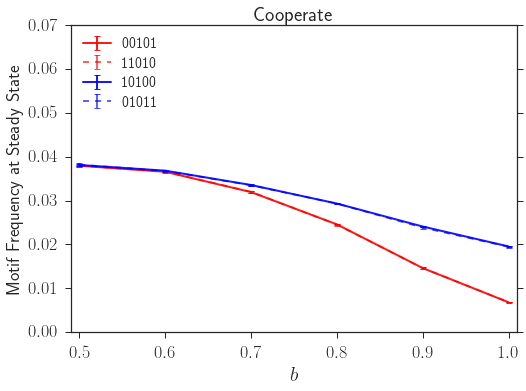

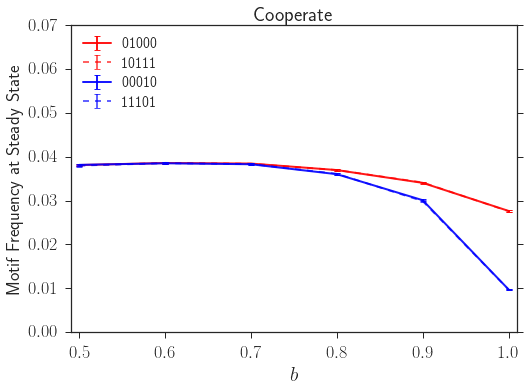

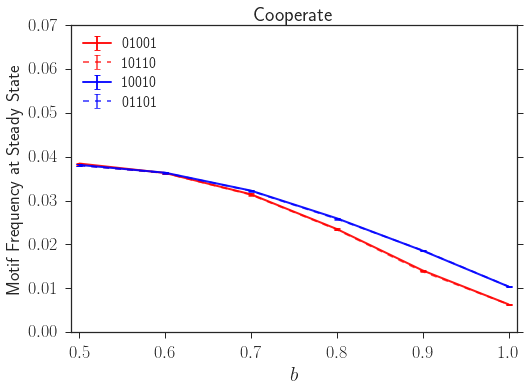

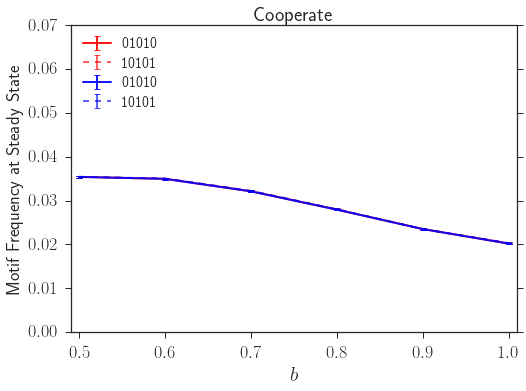

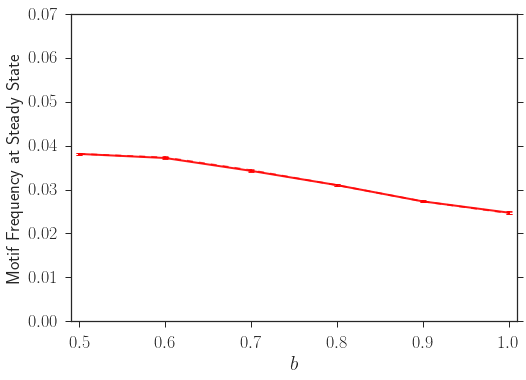

In [10]:
for motif in np.unique(cooperate_data['zero_motif'].values):
    plt.figure()
    ax = plt.subplot(111)
    mirrored = motif
    moment = cooperate_data[cooperate_data['zero_motif'] == motif]
    biaslist = np.sort(moment['high_bias'].values)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]

    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=mirrored,color='r',linewidth=2,alpha=0.9)
    for cap in caps:
        cap.set_markeredgewidth(1)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][1])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][1])  for bias in biaslist]
    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=mirrored.replace('0','2').replace('1','0').replace('2','1'),color='r',linestyle='--',alpha=0.7)
    for cap in caps:
        cap.set_markeredgewidth(1)
    
    motif = motif[::-1]
    moment = cooperate_data[cooperate_data['zero_motif'] == motif]
    biaslist = np.sort(moment['high_bias'].values)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]

    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=motif,color='b',linewidth=2,alpha=0.9)
    for cap in caps:
        cap.set_markeredgewidth(1)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][1])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][1])  for bias in biaslist]
    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=motif.replace('0','2').replace('1','0').replace('2','1'),color='b',linestyle='--',alpha=0.7)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xlim(0.49,1.01)
    plt.ylim(0.00,0.07)
    ax.xaxis.set_ticks_position('bottom')
    plt.xlabel(r"$b$",fontsize=20)
    plt.ylabel('Motif Frequency at Steady State',fontsize=18)
    plt.tick_params(labelsize=18)
    plt.legend(fontsize=14,loc='upper left')
    plt.title('Cooperate',fontsize=20)
#     plt.savefig('newleaf_revision_cooperate_colorswap_{m1}_{m2}.pdf'.format(m1=mirrored,m2=motif),bbox_inches='tight')

IndexError: tuple index out of range

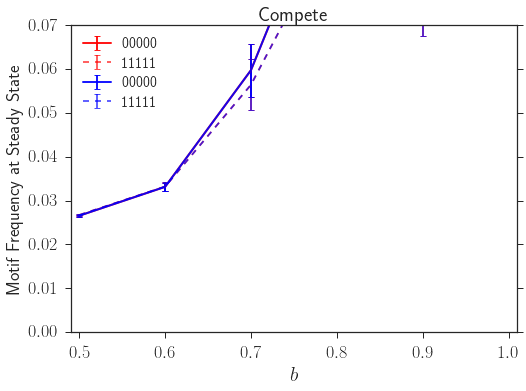

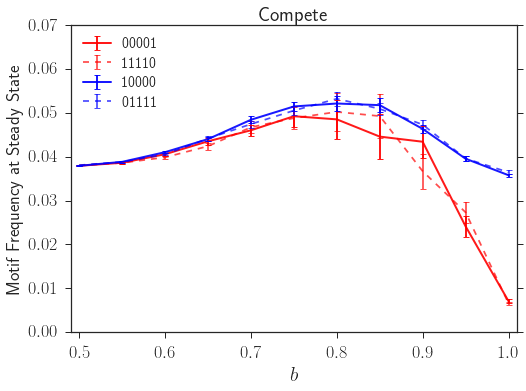

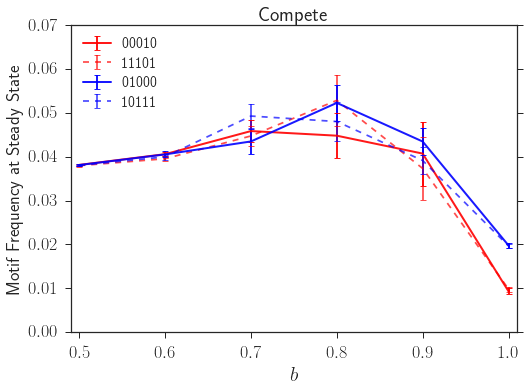

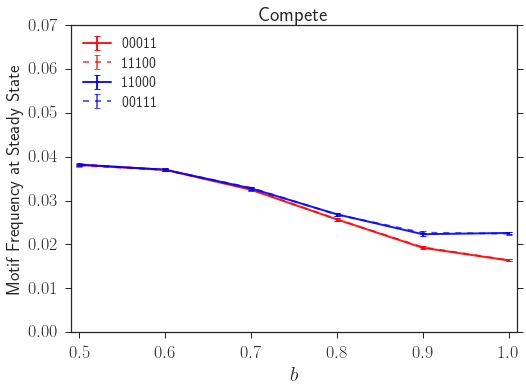

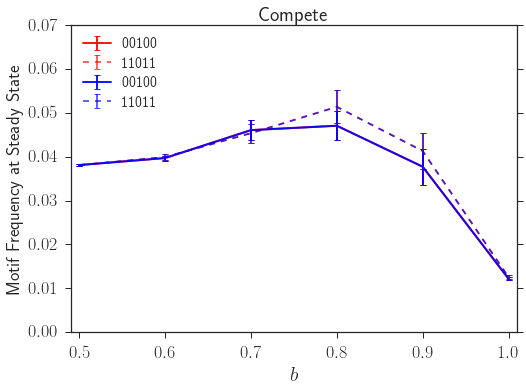

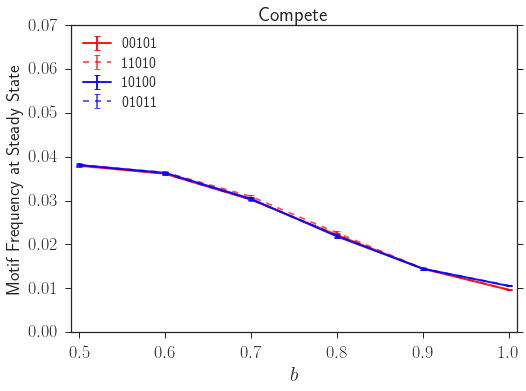

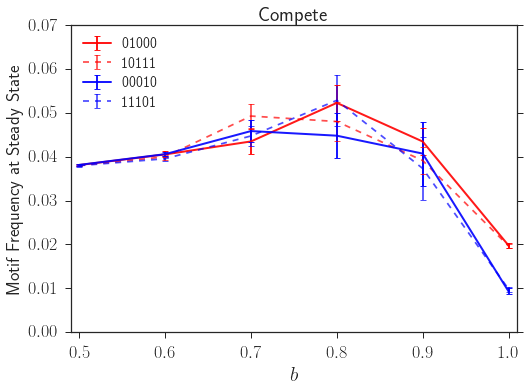

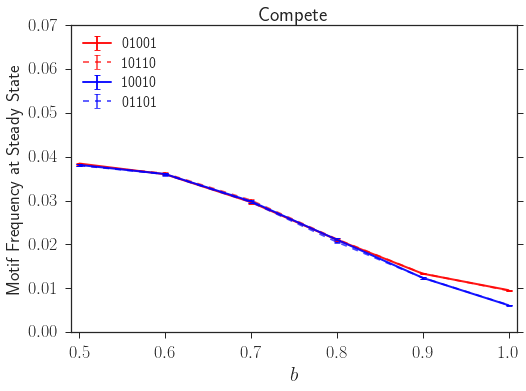

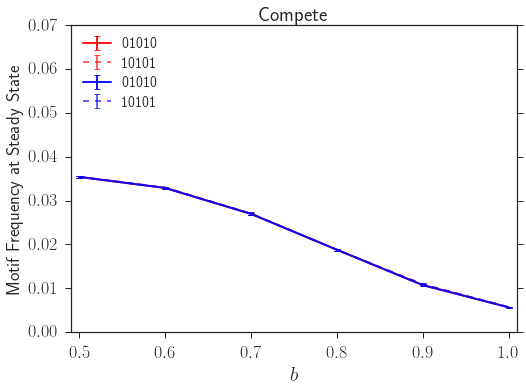

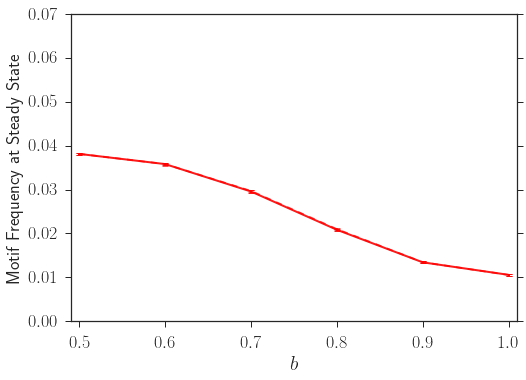

In [12]:
for motif in np.unique(compete_data['zero_motif'].values):
    plt.figure()
    ax = plt.subplot(111)
    mirrored = motif
    moment = compete_data[compete_data['zero_motif'] == motif]
    biaslist = np.sort(moment['high_bias'].values)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]

    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=mirrored,color='r',linewidth=2,alpha=0.9)
    for cap in caps:
        cap.set_markeredgewidth(1)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][1])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][1])  for bias in biaslist]
    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=mirrored.replace('0','2').replace('1','0').replace('2','1'),color='r',linestyle='--',alpha=0.7)
    for cap in caps:
        cap.set_markeredgewidth(1)

    motif = motif[::-1]
    moment = compete_data[compete_data['zero_motif'] == motif]
    biaslist = np.sort(moment['high_bias'].values)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]

    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=motif,color='b',linewidth=2,alpha=0.9)
    for cap in caps:
        cap.set_markeredgewidth(1)
    meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][1])    for bias in biaslist]
    cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][1])  for bias in biaslist]
    (__,caps,__) = plt.errorbar(biaslist,meanlist,yerr=cilist,label=motif.replace('0','2').replace('1','0').replace('2','1'),color='b',linestyle='--',alpha=0.7)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xlim(0.49,1.01)
    plt.ylim(0.00,0.07)
    ax.xaxis.set_ticks_position('bottom')
    plt.xlabel(r"$b$",fontsize=20)
    plt.ylabel('Motif Frequency at Steady State',fontsize=18)
    plt.tick_params(labelsize=18)
    plt.legend(fontsize=14,loc='upper left')
    plt.title('Compete',fontsize=20)
#     plt.savefig('newleaf_revision_compete_nolim_colorswap_{m1}_{m2}.pdf'.format(m1=mirrored,m2=motif),bbox_inches='tight')
#     plt.savefig('newleaf_revision_compete_colorswap_{m1}_{m2}.pdf'.format(m1=mirrored,m2=motif),bbox_inches='tight')
    

In [77]:
cooperate_data_no00000[cooperate_data_no00000['high_bias']==0.9]

,bias,cells,cellswithmotif,cellswithmotif_sd,cellswithmotif_se,elong,maxstrandlen,motif,motiffreq,motiffreq_sd,...,nonemptystrands_se,nr_samples,rounds,sampler_start,strands,trials,cooperate,compete,zero_motif,high_bias
38,"[0.9, 0.1]",100,"['0.85284000000000015', '0.007370610558155976']","['0.0050725141695218924', '0.007370610558155976']","['0.0011342486499881842', '0.00164811862437144...",0.05,7,"[00111, 11000]","[0.035013655233347624, 0.035020681293004764]","[0.00047653477131490271, 0.00049215463287092642]",...,['0.00020354263803930346'],50,7000,1000,100,20,True,False,11000,0.9
61,"[0.9, 0.1]",100,"['0.77416999999999991', '0.0077548436476824042']","['0.0088808276641313029', '0.00775484364768240...","['0.0019858134353458261', '0.00173403575511002...",0.05,7,"[01011, 10100]","[0.02409304917479518, 0.023842220313185399]","[0.00041483839891352369, 0.00053169693663315592]",...,['0.00029268368249698494'],50,7000,1000,100,20,True,False,10100,0.9
70,"[0.9, 0.1]",100,"['0.70740000000000003', '0.0065688583482976575']","['0.0072512067961133329', '0.00656885834829765...","['0.0016214191315017869', '0.00146884138013605...",0.05,7,"[01101, 10010]","[0.018581994485631755, 0.018645445723336856]","[0.00026518105940538021, 0.00025683055938335468]",...,['0.00019379874096597932'],50,7000,1000,100,20,True,False,10010,0.9
75,"[0.9, 0.1]",100,"['0.68302999999999991', '0.0080145867017582233']","['0.0073954783482882364', '0.00801458670175822...","['0.0016536792312900361', '0.00179211606766972...",0.05,7,"[01110, 10001]","[0.019731838450871196, 0.019541093906271866]","[0.00050201531115208063, 0.00050492063073901859]",...,['0.00019164838115674285'],50,7000,1000,100,20,True,False,10001,0.9
89,"[0.9, 0.1]",100,"['0.79094999999999993', '0.0073982700680631907']","['0.004811600565300468', '0.0073982700680631907']","['0.0010759065944588261', '0.001654303478809129']",0.05,7,"[10011, 01100]","[0.027318708609762404, 0.027319540231588845]","[0.00051172975103048698, 0.00044234877070414548]",...,['0.00017901375785116984'],50,7000,1000,100,20,True,False,01100,0.9
99,"[0.9, 0.1]",100,"['0.76337999999999995', '0.0069101085374978083']","['0.0073348210612120572', '0.00691010853749780...","['0.0016401158495667305', '0.00154514724217467...",0.05,7,"[10101, 01010]","[0.023526984856746036, 0.023507327523864828]","[0.0003659361483050524, 0.00037454493561796324]",...,['0.00018598483809171347'],50,7000,1000,100,20,True,False,01010,0.9
104,"[0.9, 0.1]",100,"['0.60818000000000005', '0.0098134397639156393']","['0.010677246836146487', '0.0098134397639156393']","['0.0023875049738168101', '0.00219435184052148...",0.05,7,"[10110, 01001]","[0.01407222720905112, 0.013820651541368611]","[0.00033939370767995024, 0.00031514773187306177]",...,['0.00021559644129715979'],50,7000,1000,100,20,True,False,01001,0.9
109,"[0.9, 0.1]",100,"['0.87238000000000004', '0.0054175271111458409']","['0.0058500940163385739', '0.00541752711114584...","['0.0013081207895297817', '0.00121139588904701...",0.05,7,"[10111, 01000]","[0.034051324912520289, 0.034145286019669506]","[0.00038312238363362856, 0.00035459198246088778]",...,['0.00016717758671543859'],50,7000,1000,100,20,True,False,01000,0.9
120,"[0.9, 0.1]",100,"['0.59147999999999989', '0.0092771709049688338']","['0.0080496956464204301', '0.00927717090496883...","['0.0017999666663580192', '0.00207443847823935...",0.05,7,"[11010, 00101]","[0.014617205058125433, 0.014622699055582059]","[0.00037031655773894551, 0.00036113388194471162]",...,['0.00020607398671351052'],50,7000,1000,100,20,True,False,00101,0.9
125,"[0.9, 0.1]",100,"['0.85666999999999993', '0.0050637041777734371']","['0.0054601373609095057', '0.00506370417777343...","['0.0012209238305479957', '0.00113227867594510...",0.05,7,"[11011, 00100]","[0.030994816164120854, 0.031099084946655708]","[0.00036852640871603182, 0.00040974197959439234]",...,['0.00019211482373831349'],50,7000,1000,100,20,True,False,00100,0.9


['00001', '10000', '00000', '11000', '01000', '00100', '00010', '00011', '01100', '10100', '01010', '10001', '10010', '00101', '01001']
15
00001
10000
00000
11000
01000
00100
00010
00011
01100
10100
01010
10001
10010
00101
01001
['00001', '10000', '00000', '11000', '01000', '00100', '00010', '00011', '01100', '10100', '01010', '10001', '10010', '00101', '01001']


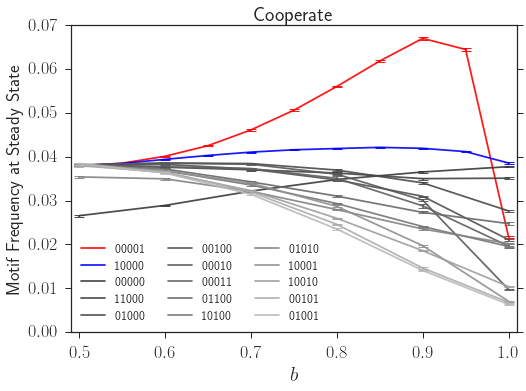

In [167]:
sns.set_palette('Greys_d',13)
fig,ax = plt.subplots()
finished = []
cooperate_data_no00000 = cooperate_data
Y = np.swapaxes(np.asarray(map(myFloat,cooperate_data_no00000[cooperate_data_no00000['high_bias']==0.9]['motiffreq'].values)),0,1)[0]
X = cooperate_data_no00000[cooperate_data_no00000['high_bias']==0.9]['zero_motif'].values
new_order = [x for (y,x) in sorted(zip(Y,X), key=lambda pair: pair[0])]
print new_order[::-1]
print len(new_order)
for motif in new_order[::-1]:
    if motif not in finished:
        mirrored = motif
        moment = cooperate_data_no00000[cooperate_data_no00000['zero_motif'] == motif]
        biaslist = np.sort(moment['high_bias'].values)
        meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
        cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]
        if motif == '10000':
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5,color='b')
        elif motif == '00001':
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5,color='r')
        else:
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5)
        for cap in caps:
                cap.set_markeredgewidth(1)

        finished.append(motif)

ax.xaxis.set_ticks_position('bottom')
plt.xlim(0.49,1.01)
plt.ylim(0,0.07)
plt.xlabel(r"$b$",fontsize=20)
plt.ylabel('Motif Frequency at Steady State',fontsize=18)
plt.tick_params(labelsize=18)
plt.title('Cooperate',fontsize=20)
plt.legend(new_order[::-1],loc='lower left',ncol=3,fontsize=12)
# plt.savefig('newleaf_revision_cooperate_all_with00000_ylim_greyscale.pdf',bbox_inches='tight')

00000
10000
01000
00001
00010
00100
11000
00011
10100
00101
10001
01100
01001
10010
01010
['00000', '10000', '01000', '00001', '00010', '00100', '11000', '00011', '10100', '00101', '10001', '01100', '01001', '10010', '01010']


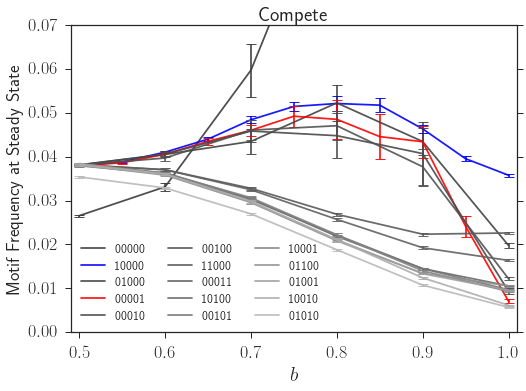

In [166]:
sns.set_palette('Greys_d',13)
fig,ax = plt.subplots()
finished = []
compete_data_no00000 = compete_data
Y = np.swapaxes(np.asarray(map(myFloat,compete_data_no00000[compete_data_no00000['high_bias']==0.9]['motiffreq'].values)),0,1)[0]
X = compete_data_no00000[compete_data_no00000['high_bias']==0.9]['zero_motif'].values
new_order = [x for (y,x) in sorted(zip(Y,X), key=lambda pair: pair[0])]
for motif in new_order[::-1]:
    if motif not in finished:
        mirrored = motif
        moment = compete_data_no00000[compete_data_no00000['zero_motif'] == motif]
        biaslist = np.sort(moment['high_bias'].values)
        meanlist = [float(moment[moment['high_bias'] == bias]['motiffreq'].values[0][0])    for bias in biaslist]
        cilist = [1.96*float(moment[moment['high_bias'] == bias]['motiffreq_se'].values[0][0])  for bias in biaslist]
        if motif == '10000':
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5,color='b')
        elif motif == '00001':
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5,color='r')
        else:
            (ebar, caps, _) = plt.errorbar(biaslist,meanlist,yerr=cilist,alpha=0.9,capsize=5)
        for cap in caps:
                cap.set_markeredgewidth(1)

        color = ebar.get_color()
        finished.append(motif)

plt.xlim(0.49,1.01)
plt.ylim(0.0,0.07)
ax.xaxis.set_ticks_position('bottom')
plt.xlabel(r"$b$",fontsize=20)
plt.ylabel('Motif Frequency at Steady State',fontsize=18)
plt.tick_params(labelsize=18)
ax.legend(finished,loc='lower left',ncol=3,fontsize=12)
plt.title('Compete',fontsize=20)
# plt.savefig('newleaf_revision_compete_all_ylim_with00000_greyscale.pdf',bbox_inches='tight')